# Backend Developer Interview Task

Author: Lisa L.

Date: August, 8, 2020


# Task 1: Maintenance Data Analysis

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving maintenance_data.csv to maintenance_data (1).csv


In [ ]:
import io
maintenance = pd.read_csv(io.BytesIO(uploaded['maintenance_data.csv']))

In [ ]:
maintenance.head()

,Item,System,Failure observation,Repair time
0,Component 1,System 01,3/19/1990,23.44
1,Component 1,System 01,8/16/1990,23.29
2,Component 1,System 01,9/24/1990,20.98
3,Component 1,System 01,12/6/1990,21.01
4,Component 1,System 01,1/20/1991,29.92


In [ ]:
maintenance.isna().sum()

Item                   0
System                 0
Failure observation    0
Repair time            0
dtype: int64

### *Question 1: Provide some high level statistics on the data set such as number of observations, and minimum and maximum values. Provide overall values (across the entire data set), values for each item, and values for each item and system combination.*

In [ ]:
#number of observations across the entire dataset
maintenance.shape

(6253, 4)

In [ ]:
#summary statistics across the entire data set
maintenance.describe(include='all')

,Item,System,Failure observation,Repair time
count,6253,6253,6253,6253.000000
unique,10,8,4555,NaN
top,Component 6,System 05,5/30/1991,NaN
freq,1888,844,6,NaN
mean,NaN,NaN,NaN,75.386456
std,NaN,NaN,NaN,67.147066
min,NaN,NaN,NaN,5.010000
25%,NaN,NaN,NaN,23.480000
50%,NaN,NaN,NaN,53.870000
75%,NaN,NaN,NaN,95.700000


In [ ]:
#number of observations by Item
maintenance.groupby('Item')['Item'].count()

Item
Component 1     1052
Component 10     344
Component 2      845
Component 3      423
Component 4      180
Component 5       29
Component 6     1888
Component 7       78
Component 8       98
Component 9     1316
Name: Item, dtype: int64

In [ ]:
#number of observations by Item & System
maintenance.groupby(['Item', 'System'])['System'].count()

Item         System   
Component 1  System 01    121
             System 02    157
             System 03    130
             System 04    124
             System 05    149
                         ... 
Component 9  System 04    141
             System 05    185
             System 06    165
             System 07    162
             System 08    144
Name: System, Length: 80, dtype: int64

In [ ]:
#Summary statistics by Item
maintenance[['Item','Repair time']].groupby('Item').describe()

Repair time                        ...                           
                   count        mean       std  ...      50%       75%     max
Item                                            ...                           
Component 1       1052.0   25.057918  2.988146  ...   25.035   27.7475   29.98
Component 10       344.0    9.921599  2.796434  ...   10.040   12.1125   14.99
Component 2        845.0   14.979053  2.914457  ...   14.980   17.5800   20.00
Component 3        423.0   54.857069  2.750052  ...   54.690   57.0600   60.00
Component 4        180.0  225.181000  2.831804  ...  225.120  227.6750  230.00
Component 5         29.0  120.034138  2.759566  ...  119.980  122.1000  124.87
Component 6       1888.0   55.024179  2.850225  ...   55.035   57.5200   59.99
Component 7         78.0   65.309231  2.965858  ...   65.415   68.1825   69.96
Component 8         98.0   94.957551  2.994754  ...   94.525   97.6375   99.93
Component 9       1316.0  184.997363  2.868010  ...  185.030  187.4600  190.00

[10 rows x 8 columns]

In [ ]:
#Summary Statistics by Item & System
maintenance[['Item','System','Repair time']].groupby(['Item','System']).describe()

Repair time              ...                  
                            count        mean  ...       75%     max
Item        System                             ...                  
Component 1 System 01       121.0   24.485455  ...   27.1600   29.96
            System 02       157.0   24.878089  ...   27.5600   29.98
            System 03       130.0   25.308846  ...   27.5425   29.96
            System 04       124.0   25.204113  ...   27.8825   29.89
            System 05       149.0   25.003154  ...   27.9400   29.97
...                           ...         ...  ...       ...     ...
Component 9 System 04       141.0  184.962766  ...  187.7300  189.99
            System 05       185.0  184.648216  ...  186.4900  189.98
            System 06       165.0  185.060909  ...  187.2600  189.95
            System 07       162.0  185.163086  ...  187.4800  189.89
            System 08       144.0  184.799097  ...  187.0425  189.97

[80 rows x 8 columns]

### *Question 2: Calculate the mean repair time for each item.*



In [ ]:
#calculate the mean repair time by item
maintenance[['Item','Repair time']].groupby('Item').mean()

,Repair time
Item,
Component 1,25.057918
Component 10,9.921599
Component 2,14.979053
Component 3,54.857069
Component 4,225.181000
Component 5,120.034138
Component 6,55.024179
Component 7,65.309231
Component 8,94.957551


### *Question 3: Calculate the failure rate (failures per hour) for each item and system combination.*

In [ ]:
#check to see if failure observation is a date
maintenance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6253 entries, 0 to 6252
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item                 6253 non-null   object 
 1   System               6253 non-null   object 
 2   Failure observation  6253 non-null   object 
 3   Repair time          6253 non-null   float64
dtypes: float64(1), object(3)
memory usage: 195.5+ KB


In [ ]:
#convert failure observation to a date
maintenance['Failure observation'] = pd.to_datetime(maintenance['Failure observation'])

#doublce check failure observation is a date
maintenance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6253 entries, 0 to 6252
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Item                 6253 non-null   object        
 1   System               6253 non-null   object        
 2   Failure observation  6253 non-null   datetime64[ns]
 3   Repair time          6253 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 195.5+ KB


In [ ]:
#Add column for a unique identifier of component & system combination
maintenance['unique_id'] = maintenance['Item'] + maintenance['System']

maintenance.head()

,Item,System,Failure observation,Repair time,unique_id
0,Component 1,System 01,1990-03-19,23.44,Component 1System 01
1,Component 1,System 01,1990-08-16,23.29,Component 1System 01
2,Component 1,System 01,1990-09-24,20.98,Component 1System 01
3,Component 1,System 01,1990-12-06,21.01,Component 1System 01
4,Component 1,System 01,1991-01-20,29.92,Component 1System 01


In [ ]:
#count how many per group and check with earlier section
maintenance.groupby('unique_id')['unique_id'].count()

unique_id
Component 10System 01     43
Component 10System 02     54
Component 10System 03     31
Component 10System 04     59
Component 10System 05     46
                        ... 
Component 9System 04     141
Component 9System 05     185
Component 9System 06     165
Component 9System 07     162
Component 9System 08     144
Name: unique_id, Length: 80, dtype: int64

In [ ]:
#make a dataframe with just Component 1 System 1 for Task 3
comp1_sys1 = maintenance[maintenance['unique_id'] == 'Component 1System 01']

comp1_sys1.shape

(121, 5)

In [ ]:
#calculate how many totaldays in data sample
timespan = comp1_sys1.iloc[-1, 2] - comp1_sys1.iloc[0, 2]
print(timespan.days)

#caculate how many failures during data sample
failure_interarrival_time = len(comp1_sys1) 

#calculate the failure rate per hour and print out answer
print('The failure rate for Component 1 System 1 is ' + str(121 / (9172 *24)) + ' per hour assuming it runs 24 hours per day, 365 days per year.')

9172
The failure rate for Component 1 System 1 is 0.0005496801860735572 per hour assuming it runs 24 hours per day, 365 days per year.


### *Question 4: Generate failure interarrival times (time between failures) for each item and system. What’s the expected value of the interarrival times? Does it correspond to the failure rate?*

In [ ]:
#create two date columns
date1 = comp1_sys1.iloc[0:120, 2]
date2 = comp1_sys1.iloc[1:121, 2]

#reset index on second date column so the indices align
date2 = date2.reset_index(drop=True)

#double check resetting the indices worked
print(date1)
print(date2)

0     1990-03-19
1     1990-08-16
2     1990-09-24
3     1990-12-06
4     1991-01-20
         ...    
115   2013-11-23
116   2014-04-28
117   2014-07-02
118   2014-09-11
119   2014-09-24
Name: Failure observation, Length: 120, dtype: datetime64[ns]
0     1990-08-16
1     1990-09-24
2     1990-12-06
3     1991-01-20
4     1991-03-30
         ...    
115   2014-04-28
116   2014-07-02
117   2014-09-11
118   2014-09-24
119   2015-04-29
Name: Failure observation, Length: 120, dtype: datetime64[ns]


In [ ]:
#merge the two date columns into one data frame
data = {'date1': date1, 'date2': date2}
dates11 = pd.DataFrame.from_dict(data)

#double check the merge
dates11.head()

,date1,date2
0,1990-03-19,1990-08-16
1,1990-08-16,1990-09-24
2,1990-09-24,1990-12-06
3,1990-12-06,1991-01-20
4,1991-01-20,1991-03-30


In [ ]:
#find the difference between each pair of days of failure observations
dates11['diff_days'] = dates11['date2'] - dates11['date1']

#convert answers into days
dates11['diff_days'] = dates11['diff_days'] / np.timedelta64(1,'D')

In [ ]:
#double check new column
dates11.head()

,date1,date2,diff_days
0,1990-03-19,1990-08-16,150.0
1,1990-08-16,1990-09-24,39.0
2,1990-09-24,1990-12-06,73.0
3,1990-12-06,1991-01-20,45.0
4,1991-01-20,1991-03-30,69.0


In [ ]:
#caculate and print the average number of days between failure observations
print('The average time between failures is ' + str(dates11['diff_days'].mean()) + ' days.')

The average time between failures is 76.43333333333334 days.


### *Question 5: Create a histogram of the interarrival times for a single item. Can you draw any conclusion on the underlying distribution?*

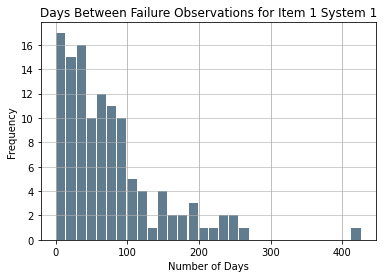

In [224]:
import matplotlib.pyplot as plt

#create a histogram to show number of days between failure observations for Item 1 System 1
dates11['diff_days'].plot.hist(grid=True, bins=30, rwidth=0.9,
                   color='#607c8e')
plt.title('Days Between Failure Observations for Item 1 System 1')
plt.xlabel('Number of Days')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Task 2: Parse LSA Records

### *Option 1: Single Line LSA*

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving lsa_single_line.txt to lsa_single_line (1).txt


In [ ]:
import io
single_line = pd.read_csv(io.BytesIO(uploaded['lsa_single_line.txt']), names=['Col1','Col2'])

In [ ]:
single_line.head()

,Col1,Col2
0,C1234AAAAA ATESTBENCH ...,NaN
1,C1234ABAAA ATBU01 11000 237.75 AAAA 4...,NaN
2,C1234ABAAB ATBU02 1986 15.89999AAAA 4...,NaN
3,C1234ABAAC ATBU03 3971 50.99000AAAA 8...,NaN
4,C1234ABAAD ATBU04 1171 46.59999AAAA 4...,NaN


In [ ]:
#parse out different columns
single_line['pccn'] = single_line['Col1'].str.slice(stop=6)

single_line['plisn'] = single_line['Col1'].str.slice(start=6,stop=11)

single_line['Cfi'] = single_line['Col1'].str.slice(start=11,stop=12)

single_line['item_name'] = single_line['Col1'].str.slice(start=12,stop=24)

single_line['unit_price'] = single_line['Col1'].str.slice(start=24,stop=32)

single_line['failure_rate'] = single_line['Col1'].str.slice(start=32,stop=40)

single_line['next_higher_plisn'] = single_line['Col1'].str.slice(start=40,stop=45)

single_line['qty_per_assembly'] = single_line['Col1'].str.slice(start=45,stop=50)

In [ ]:
#drop extra columns
single_line = single_line.drop(['Col1','Col2'], axis=1)


In [ ]:
#double check
single_line.head(10)

,pccn,plisn,Cfi,item_name,unit_price,failure_rate,next_higher_plisn,qty_per_assembly
0,C1234A,AAAA,A,TESTBENCH,,,,
1,C1234A,BAAA,A,TBU01,11000,237.75,AAAA,4
2,C1234A,BAAB,A,TBU02,1986,15.89999,AAAA,4
3,C1234A,BAAC,A,TBU03,3971,50.99000,AAAA,8
4,C1234A,BAAD,A,TBU04,1171,46.59999,AAAA,40
5,C1234A,BAAE,A,TBU05,1229,113.9000,AAAA,4
6,C1234A,BAAF,A,TBU06,1021,27,AAAA,4
7,C1234A,BAAG,A,TBU07,1393,68,AAAA,1
8,C1234A,BAAH,A,TBU08,250,68,AAAA,1
9,C1234A,BAAI,A,TBU09,557,73.69999,AAAA,4


In [ ]:
#export the csv file
from google.colab import files
single_line.to_csv('single_line.csv') 
files.download('single_line.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### *Option 2: Multi Line LSA*

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving lsa_multi_line.txt to lsa_multi_line.txt


In [ ]:
import io
multi_line = pd.read_csv(io.BytesIO(uploaded['lsa_multi_line.txt']), names="C")

In [ ]:
multi_line.head(10)

,C
0,C1234AAAAA ATESTBENCH
1,C1234AAAAA B
2,C1234ABAAA ATBU01 11000 237.75
3,C1234ABAAA BAAAA 4
4,C1234ABAAB ATBU02 1986 15.89999
5,C1234ABAAB BAAAA 4
6,C1234ABAAC ATBU03 3971 50.99000
7,C1234ABAAC BAAAA 8
8,C1234ABAAD ATBU04 1171 46.59999
9,C1234ABAAD BAAAA 40


In [ ]:
#Split off the odd rows
multi_line_odd = multi_line.iloc[lambda x: x.index % 2 == 0].reset_index(drop=True)

multi_line_odd.head(10)

,C
0,C1234AAAAA ATESTBENCH
1,C1234ABAAA ATBU01 11000 237.75
2,C1234ABAAB ATBU02 1986 15.89999
3,C1234ABAAC ATBU03 3971 50.99000
4,C1234ABAAD ATBU04 1171 46.59999
5,C1234ABAAE ATBU05 1229 113.9000
6,C1234ABAAF ATBU06 1021 27
7,C1234ABAAG ATBU07 1393 68
8,C1234ABAAH ATBU08 250 68
9,C1234ABAAI ATBU09 557 73.69999


In [ ]:
#Split off the even rows
multi_line_even = multi_line.iloc[lambda x: x.index % 2 != 0].reset_index(drop=True)


multi_line_even.head(10)

,C
0,C1234AAAAA B
1,C1234ABAAA BAAAA 4
2,C1234ABAAB BAAAA 4
3,C1234ABAAC BAAAA 8
4,C1234ABAAD BAAAA 40
5,C1234ABAAE BAAAA 4
6,C1234ABAAF BAAAA 4
7,C1234ABAAG BAAAA 1
8,C1234ABAAH BAAAA 1
9,C1234ABAAI BAAAA 4


In [ ]:
#merge the odd and even rows back together, so that each item is on one line
merged_multi_line = multi_line_odd.merge(multi_line_even, left_index=True, right_index=True)

merged_multi_line.head(10)


,C_x,C_y
0,C1234AAAAA ATESTBENCH,C1234AAAAA B
1,C1234ABAAA ATBU01 11000 237.75,C1234ABAAA BAAAA 4
2,C1234ABAAB ATBU02 1986 15.89999,C1234ABAAB BAAAA 4
3,C1234ABAAC ATBU03 3971 50.99000,C1234ABAAC BAAAA 8
4,C1234ABAAD ATBU04 1171 46.59999,C1234ABAAD BAAAA 40
5,C1234ABAAE ATBU05 1229 113.9000,C1234ABAAE BAAAA 4
6,C1234ABAAF ATBU06 1021 27,C1234ABAAF BAAAA 4
7,C1234ABAAG ATBU07 1393 68,C1234ABAAG BAAAA 1
8,C1234ABAAH ATBU08 250 68,C1234ABAAH BAAAA 1
9,C1234ABAAI ATBU09 557 73.69999,C1234ABAAI BAAAA 4


In [ ]:
#Combine the two columns into one column so that it can be parsed
merged_multi_line['Col1'] = merged_multi_line['C_x'] + merged_multi_line['C_y']

merged_multi_line.head()


,C_x,C_y,Col1
0,C1234AAAAA ATESTBENCH,C1234AAAAA B,C1234AAAAA ATESTBENCH C1234A...
1,C1234ABAAA ATBU01 11000 237.75,C1234ABAAA BAAAA 4,C1234ABAAA ATBU01 11000 237.75 C1234A...
2,C1234ABAAB ATBU02 1986 15.89999,C1234ABAAB BAAAA 4,C1234ABAAB ATBU02 1986 15.89999C1234A...
3,C1234ABAAC ATBU03 3971 50.99000,C1234ABAAC BAAAA 8,C1234ABAAC ATBU03 3971 50.99000C1234A...
4,C1234ABAAD ATBU04 1171 46.59999,C1234ABAAD BAAAA 40,C1234ABAAD ATBU04 1171 46.59999C1234A...


In [ ]:
#parse out different columns
merged_multi_line['pccn'] = merged_multi_line['Col1'].str.slice(stop=6)

merged_multi_line['plisn'] = merged_multi_line['Col1'].str.slice(start=6,stop=11)

merged_multi_line['Cfi'] = merged_multi_line['Col1'].str.slice(start=11,stop=12)

merged_multi_line['item_name'] = merged_multi_line['Col1'].str.slice(start=12,stop=24)

merged_multi_line['unit_price'] = merged_multi_line['Col1'].str.slice(start=24,stop=32)

merged_multi_line['failure_rate'] = merged_multi_line['Col1'].str.slice(start=32,stop=40)

merged_multi_line['next_higher_plisn'] = merged_multi_line['Col1'].str.slice(start=52,stop=56)

merged_multi_line['qty_per_assembly'] = merged_multi_line['Col1'].str.slice(start=56,stop=61)


In [ ]:
#drop extra columns
multi_line_clean = merged_multi_line = merged_multi_line.drop(['Col1','C_x','C_y'], axis=1)

In [ ]:
#double check that it matches the solution
multi_line_clean.head(10)

,pccn,plisn,Cfi,item_name,unit_price,failure_rate,next_higher_plisn,qty_per_assembly
0,C1234A,AAAA,A,TESTBENCH,,,,
1,C1234A,BAAA,A,TBU01,11000,237.75,AAAA,4
2,C1234A,BAAB,A,TBU02,1986,15.89999,AAAA,4
3,C1234A,BAAC,A,TBU03,3971,50.99000,AAAA,8
4,C1234A,BAAD,A,TBU04,1171,46.59999,AAAA,40
5,C1234A,BAAE,A,TBU05,1229,113.9000,AAAA,4
6,C1234A,BAAF,A,TBU06,1021,27,AAAA,4
7,C1234A,BAAG,A,TBU07,1393,68,AAAA,1
8,C1234A,BAAH,A,TBU08,250,68,AAAA,1
9,C1234A,BAAI,A,TBU09,557,73.69999,AAAA,4


In [ ]:
#export the csv file
from google.colab import files
multi_line_clean.to_csv('multi_line_clean.csv') 
files.download('multi_line_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Task 3: Database Creation

In [ ]:
import sqlite3

In [ ]:
#create database
conn = sqlite3.connect('LSA.db')
c = conn.cursor()

In [ ]:
#create table in database
c.execute('''CREATE TABLE Logistics
            ([item_name] TEXT PRIMARY KEY, [pccn] text, [plisn] text, [cfi] text, [unit_price] integer, 
            [failure_rate] float, [next_higher_plisn] text, [qty_per_assembly] integer)''')

conn.commit()

# Task 4: Data Insertion

In [ ]:
import pandas as pd
from pandas import DataFrame

In [ ]:
#add cleaned single line LSA data
single_line.to_sql('Logistics', conn, if_exists='replace', index = False)

In [ ]:
#double check that data loaded
c.execute('''SELECT * FROM Logistics''')
print(c.fetchall())

[('C1234A', 'AAAA ', 'A', 'TESTBENCH   ', '        ', '        ', '     ', '     '), ('C1234A', 'BAAA ', 'A', 'TBU01       ', '11000   ', '237.75  ', 'AAAA ', '4    '), ('C1234A', 'BAAB ', 'A', 'TBU02       ', '1986    ', '15.89999', 'AAAA ', '4    '), ('C1234A', 'BAAC ', 'A', 'TBU03       ', '3971    ', '50.99000', 'AAAA ', '8    '), ('C1234A', 'BAAD ', 'A', 'TBU04       ', '1171    ', '46.59999', 'AAAA ', '40   '), ('C1234A', 'BAAE ', 'A', 'TBU05       ', '1229    ', '113.9000', 'AAAA ', '4    '), ('C1234A', 'BAAF ', 'A', 'TBU06       ', '1021    ', '27      ', 'AAAA ', '4    '), ('C1234A', 'BAAG ', 'A', 'TBU07       ', '1393    ', '68      ', 'AAAA ', '1    '), ('C1234A', 'BAAH ', 'A', 'TBU08       ', '250     ', '68      ', 'AAAA ', '1    '), ('C1234A', 'BAAI ', 'A', 'TBU09       ', '557     ', '73.69999', 'AAAA ', '4    '), ('C1234A', 'BAAJ ', 'A', 'TBU10       ', '975     ', '65.69999', 'AAAA ', '1    '), ('C1234A', 'BAAK ', 'A', 'TBU11       ', '8929    ', '8       ', 'AAAA ', '